In [1]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2

# Running GENE on LUMI to find mode transition within error bounds

Each parameter will be kept at the nominal except one exception. The exception will be altered through it's error bound and the growthrate will be plotted as a function of the exception parameter. 

In [9]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)
from GENE_ML.gene_ml.samplers.grid import Grid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from config import config


samplers = []
n_samples = 50
parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
nominal = [2.7954880, 5.3871083, 1.5417906]
bounds = [(4,6.7), (2.1,3.5), (0.16,2.9)] #if bounds is a float rather than tuple then the sampler will make that the only value
for p,b in zip(parameters, bounds):
    samplers.append(Grid([b], n_samples,[p]))

remote_save_names = ['modeTrans-highprec-'+p for p in parameters]
ex_id_base = 'modeTransTest_'
ex_ids=[ex_id_base+str(i) for i in range(len(samplers))]
data_gens = []
for sampler, remote_save_name, ex_id in zip(samplers, remote_save_names, ex_ids):
    data_gens.append(DataGen(config, sampler, remote_save_name=remote_save_name, single_run_timelim=1000000, single_run_simtimelim=300, num_workers=2, ex_id=ex_id))
# import os
# import sys
# pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
# print('PATHAP',pathap)
# sys.path.append(pathap)

# from GENE_ML.gene_ml.samplers.grid import Grid
# from GENE_ML.gene_ml.executors.ScanExecutor import ScanExecutor
# from GENE_ML.gene_ml.runners.GENErunner import GENErunner
# from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser

# sys.path.append(os.path.join(os.getcwd(),'GENE_ML','enchanted-surrogates','src'))
# parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
# nominal = [2.7954880, 5.3871083, 1.5417906]

# bounds = [(4,6.7), (2.1,3.5), (0.16,2.9)] #if bounds is a float rather than tuple then the sampler will make that the only value

# samplers = []
# n_samples = 100
# for p,b in zip(parameters, bounds):
#     samplers.append(Grid([b], n_samples,[p]))


# ##Parser
# #The parsers main function is write_input_file
# # wite_input_file takes a parameters file from base_params_path and a set of points in the form of a dict {param1:[point1,point2...], param2:[point1,point2...]...} 
# #  It will then create a parameters file that can scan over all the points.
# base_params_path = os.path.join(os.getcwd(),'parameters_base_uq')
# save_dir = "temp/"
# parser = GENE_scan_parser(save_dir, base_params_path, remote_save_dir=None)

# ## Runner
# #The Runner is responsible for actually running a parameters file on lumi. Its main function is code_run.
# # code_run will take the set of points named samples and parse them into a parameters file.
# #  It then uses ssh to run GENE with this parametres file and a passed sbatch script.
# host = 'lumi3' #needs to be configured in /home/<user>/.ssh/config
# sbatch_base_path = os.path.join('sbatch_base')
# guess_sample_wallseconds = 200 # a guess for the number of seconds it takes to run one sample.
# remote_run_dir = '/project/project_462000451/gene/'
# runner = GENErunner(parser, host, sbatch_base_path, guess_sample_wallseconds, remote_run_dir)

# ##Executor
# #The executor will divide the samples into batches; one for each worker. Each batch will be ran in paralell in seperate sbatch jobs. 
# # The executor should alter a base batch script to account for that less samples will be ran. 
# num_workers = 2
# run_names = ['modeTrans3-'+p for p in parameters]
# remote_save_dirs = [f'/scratch/project_462000451/gene_out/gene_auto/{run_name}' for run_name in run_names]
# executors = []
# for sampler, remote_save_dir in zip(samplers, remote_save_dirs):
#     executors.append(ScanExecutor(num_workers, sampler, runner, remote_save_dir=remote_save_dir))


PATHAP GENE_ML/gene_ml/static_sparse_grid_approximations


In [3]:
# import numpy as np
# ex_ids = np.arange(len(executors))
# for data_gen in data_gens:
#     data_gen.executor.start_runs()

In [4]:
class parent:
    def __init__(self, att):
        self.att = att

class child(parent):
    def yo(self):
        print('nonsence')
child_instance = child(att='at')

print(child_instance.att)
child_instance.att = 'kkk'
print(child_instance.att)


at
kkk


# Pulling Data from LUMI

The data loaded was created by scanning over ion and electron temperature gradients within their margin of uncertainty. 

In [5]:
# remote_save_names = [r+'50' for r in remote_save_names]

In [10]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData
import os
host = 'lumi3'

test_percentage = 0
GENE_groundTruth = []

for data_gen in data_gens:
    ## If the data is already loaded from the remote to local .../scanlogs/<data_name> then the host and remote path can be ommitted
    GENE_groundTruth.append(ScanData(data_gen.remote_save_name, parser=data_gen.parser, host=host, remote_path=data_gen.remote_save_dir,  test_percentage=test_percentage))


Initialising dataset
SSH PATH lumi3:/scratch/project_462000451/gene_out/gene_auto/modeTrans-highprec-_grp_species_0-omt
SCAN LOG PATH /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER 

In [7]:
GENE_groundTruth[0].df.head()

IndexError: list index out of range

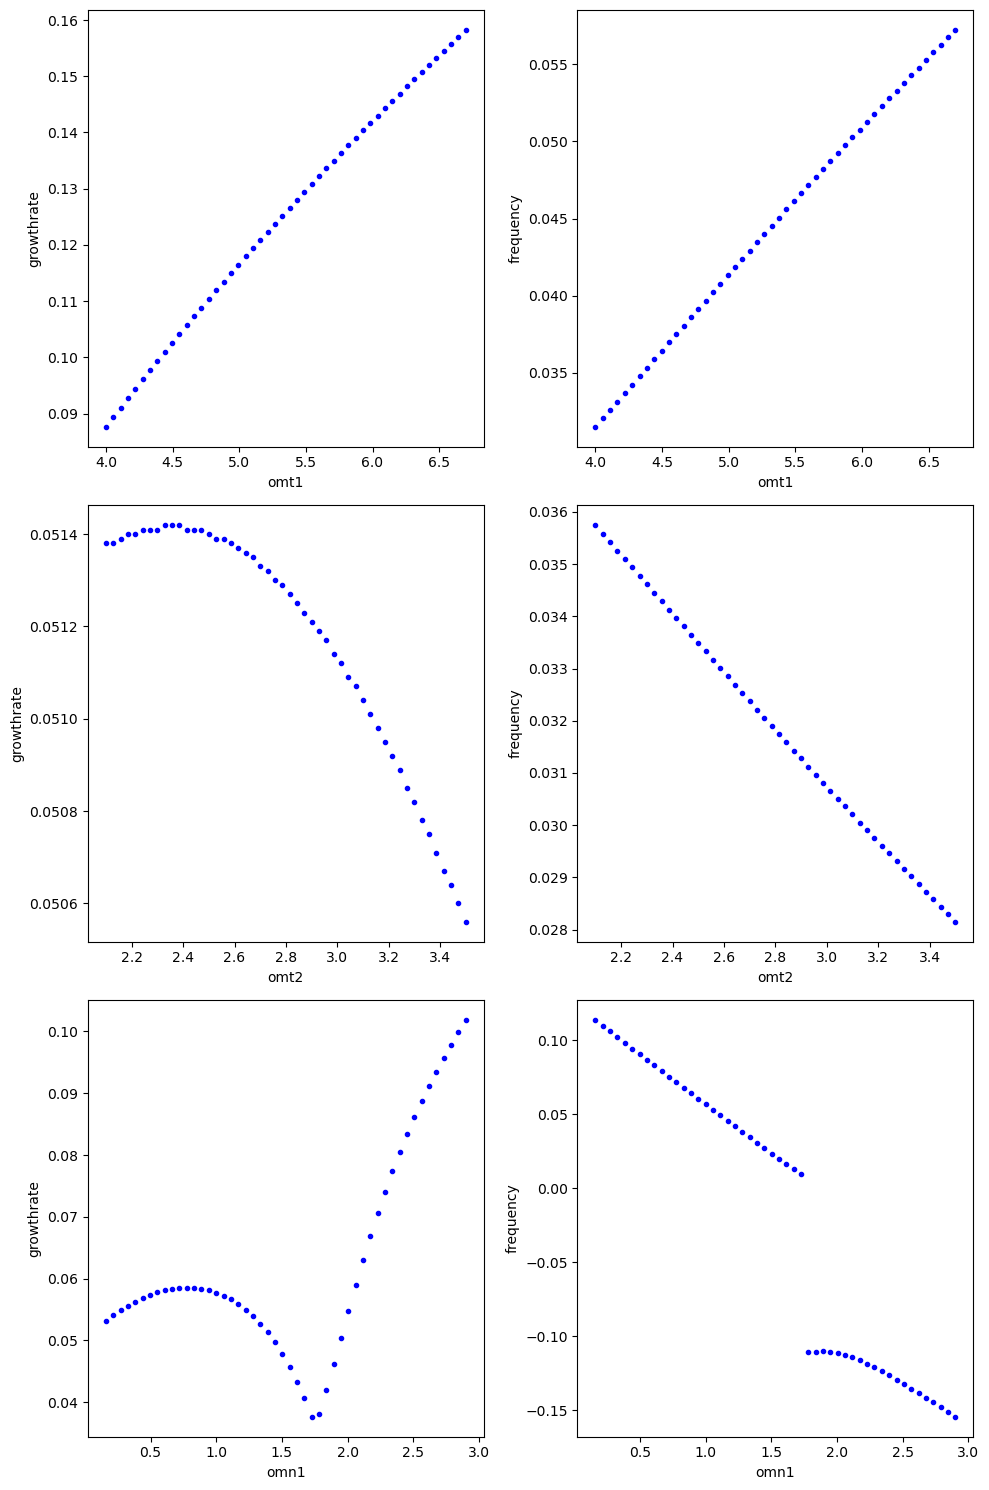

In [11]:
import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        col = GENE_groundTruth[i].df.columns.values.tolist()
        x = GENE_groundTruth[i].df[col[1]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        AX[i][j].plot(x, y, '.b')
        AX[i][j].set_xlabel(col[1])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
plt.show(figure)


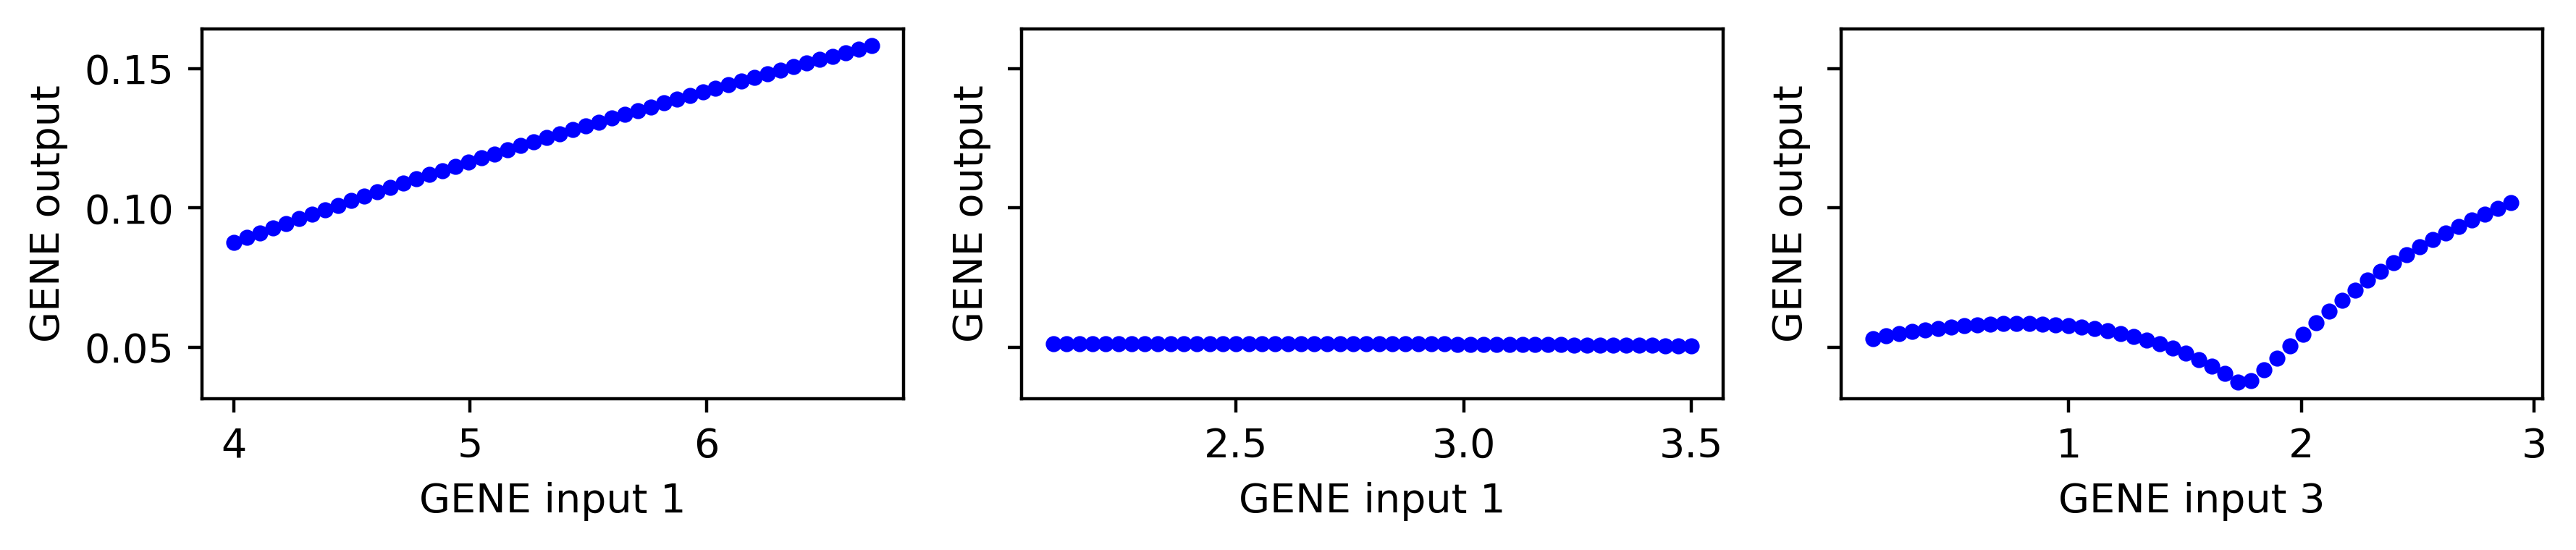

In [30]:
import matplotlib.pyplot as plt
gene_out = ['growthrate']
width = 3
height =2
nrow = len(gene_out)
ncol = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height), sharey=True, dpi=400)
x_labels = ['GENE input 1','GENE input 1', 'GENE input 3']
for i in range(len(AX)):
    col = GENE_groundTruth[i].df.columns.values.tolist()
    x = GENE_groundTruth[i].df[col[1]].to_numpy(dtype=float)
    y = GENE_groundTruth[i].df[gene_out[0]].to_numpy(dtype=float)
    AX[i].plot(x, y, '.b')
    AX[i].set_xlabel(x_labels[i])
    AX[i].set_ylabel('GENE output')
        
figure.tight_layout()
plt.show(figure)


# Plotting Run Time Dependance

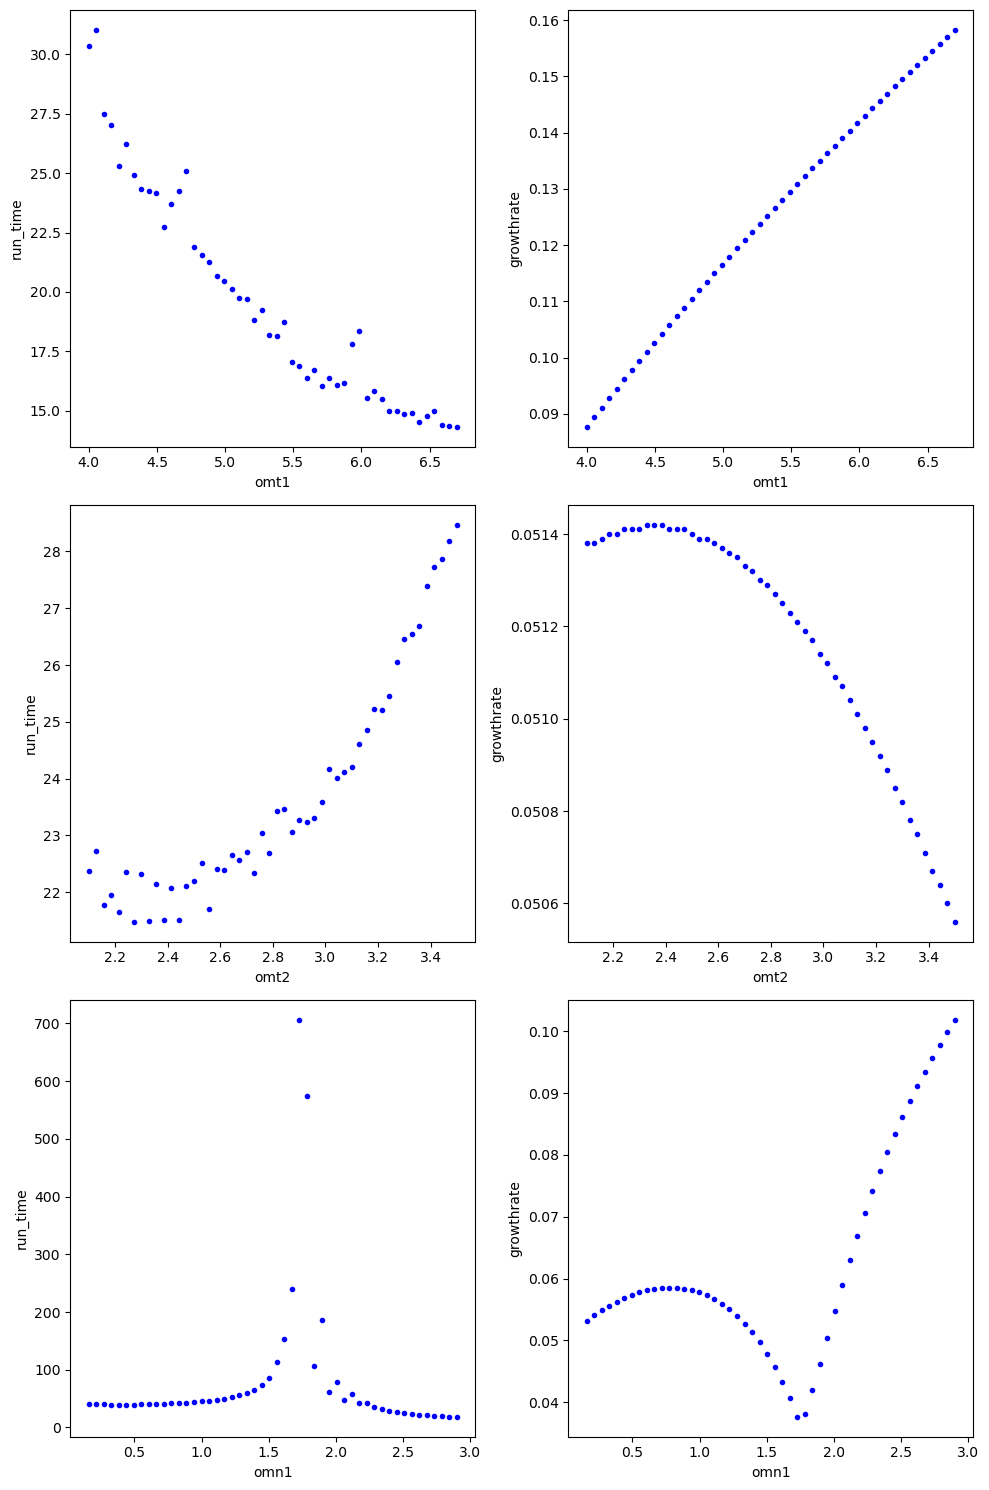

In [9]:
import matplotlib.pyplot as plt
gene_out = ['run_time','growthrate']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        col = GENE_groundTruth[i].df.columns.values.tolist()
        x = GENE_groundTruth[i].df[col[1]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        AX[i][j].plot(x, y, '.b')
        AX[i][j].set_xlabel(col[1])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
plt.show(figure)


# Running SSG points on GENE-Lumi for ssg_poly training

In [10]:
print(parameters)
print(bounds)

['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn']
[(4, 6.7), (2.1, 3.5), (0.16, 2.9)]


In [11]:
from GENE_ML.gene_ml.samplers.static_sparse_grid import StaticSparseGrid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from config import config

ssg_sampler = StaticSparseGrid(parameters=parameters, bounds=bounds, level=7)
print("NUM SSG SAMPLES",ssg_sampler.num_samples)
ssg_datagen = DataGen(config, ssg_sampler, ex_id='ssg', remote_save_name='ssg-highprec_2omt_omn', guess_sample_wallseconds=200, num_workers=2)
print('PARAMETERS IN SAMPLER', ssg_datagen.executor.sampler.samples.keys())

POINTS SHAPE (84, 3)
 no points for dim = 3 and level = 7 is n = 84
NUM SSG SAMPLES 84
PARAMETERS IN SAMPLER dict_keys(['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn'])


In [12]:
# ssg_datagen.executor.start_runs(ex_id='ssg-highprec_2omt_omn')

# Collecting SSG-point results from LUMI for growthrate and frequency of microinstabilities

In [13]:
from GENE_ML.gene_ml.dataset.ScanData import SSG_ScanData
import os
host = 'lumi'
data_name = 'data_ssg_2omt-highprec_omn'
test_percentage = 0

ssg_data = SSG_ScanData(data_name, ssg_datagen.parser, host=host, remote_path=ssg_datagen.remote_save_dir,  test_percentage=test_percentage)
ssg_data.match_sampler(ssg_sampler)


Initialising dataset
SSH PATH lumi:/scratch/project_462000451/gene_out/gene_auto/ssg-highprec_2omt_omn

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/geneerr_batch-1_scanfiles-0.log

84 SAMPLES RAN OUT OF 99 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 84
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST PERCENTAGE IS 0, NO SPLIT

CHECKING THAT THE SSG SAMPLER AND DATASET HAVE M

In [32]:
ssg_data.df.head()

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,16.739,5.35,2.8,1.53,0.12091,0.06387
1,17.068,6.70,2.8,1.53,0.14990,0.07666
2,15.260,5.35,3.5,1.53,0.12286,0.05903
3,16.935,5.35,2.8,2.90,0.09682,-0.03230
4,14.677,4.00,2.8,1.53,0.08748,0.04885


# Fitting the ssg_poly to the ssg_data

In [14]:
from GENE_ML.gene_ml.models.SSG_POLY import SSG_POLY
poly = SSG_POLY(ssg_sampler=ssg_sampler, name='ssg_poly')
poly.train(y=ssg_data.growthrates)

In [15]:
# import numpoly

# polynomial = poly.get_polynomial()

# polynomial(1,2,3)



In [16]:
# polynomial([1,3],[2,4],[3,5])


In [17]:
import numpy as np
import pandas as pd
nominal_block = np.stack([nominal for i in range(len(GENE_groundTruth[0].df))])
nominal_df = pd.DataFrame(nominal_block)
nominal_df.columns=ssg_sampler.parameters

nominal_df

,_grp_species_0-omt,_grp_species_1-omt,species-omn
0,2.795488,5.387108,1.541791
1,2.795488,5.387108,1.541791
2,2.795488,5.387108,1.541791
3,2.795488,5.387108,1.541791
4,2.795488,5.387108,1.541791
5,2.795488,5.387108,1.541791
6,2.795488,5.387108,1.541791
7,2.795488,5.387108,1.541791
8,2.795488,5.387108,1.541791
9,2.795488,5.387108,1.541791


In [18]:
print(GENE_groundTruth[0].df.head(5))
print(ssg_sampler.parameters)
print(ssg_data.df.head())
# ssg_data.set_from_df()
print(ssg_data.x)

  run_time      omt1 growthrate frequency
0   30.330  4.000000    0.08769   0.03151
1   31.028  4.055102    0.08940   0.03205
2   27.473  4.110204    0.09110   0.03260
3   27.004  4.165306    0.09278   0.03314
4   25.307  4.220408    0.09445   0.03369
['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn']
  run_time  _grp_species_0-omt  _grp_species_1-omt  species-omn growthrate  \
0   16.739                5.35                 2.8         1.53    0.12091   
1   17.068                6.70                 2.8         1.53    0.14990   
2   15.260                5.35                 3.5         1.53    0.12286   
3   16.935                5.35                 2.8         2.90    0.09682   
4   14.677                4.00                 2.8         1.53    0.08748   

  frequency  
0   0.06387  
1   0.07666  
2   0.05903  
3  -0.03230  
4   0.04885  
[[5.35       2.8        1.53      ]
 [6.7        2.8        1.53      ]
 [5.35       3.5        1.53      ]
 [5.35       2.8        2.9

# Putting the ground truth in the correct format for inference

i.e. adding in the nominal values.

In [19]:
import pandas as pd
# gt_df = GENE_groundTruth[0].df
# new_df = nominal_df
# new_head = new_df.columns.values.tolist()
# gt_head = gt_df.columns.values.tolist()
# new_df[new_head[0]] = gt_df[gt_head[0]].tolist()
# new_df

for i in range(len(ssg_sampler.parameters)):
    new_df = nominal_df.copy()
    col = GENE_groundTruth[i].df.columns.values.tolist()
    new_df[ssg_sampler.parameters[i]] = GENE_groundTruth[i].df[col[1]].tolist()
    new_df['growthrate']=GENE_groundTruth[i].df['growthrate'].tolist()
    new_df['frequency']=GENE_groundTruth[i].df['frequency'].tolist()
    new_df.insert(0, 'run_time', GENE_groundTruth[i].df['run_time'].to_numpy())
    GENE_groundTruth[i].df = new_df
    GENE_groundTruth[i].set_from_df()
    
    print(GENE_groundTruth[i].x[0:5])
    print(ssg_sampler.parameters)
    print('NEW DF', GENE_groundTruth[i].df.head(5))


TEST PERCENTAGE IS 0, NO SPLIT
[[4.        5.3871083 1.5417906]
 [4.055102  5.3871083 1.5417906]
 [4.110204  5.3871083 1.5417906]
 [4.165306  5.3871083 1.5417906]
 [4.220408  5.3871083 1.5417906]]
['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn']
NEW DF   run_time  _grp_species_0-omt  _grp_species_1-omt  species-omn growthrate  \
0   30.330            4.000000            5.387108     1.541791    0.08769   
1   31.028            4.055102            5.387108     1.541791    0.08940   
2   27.473            4.110204            5.387108     1.541791    0.09110   
3   27.004            4.165306            5.387108     1.541791    0.09278   
4   25.307            4.220408            5.387108     1.541791    0.09445   

  frequency  
0   0.03151  
1   0.03205  
2   0.03260  
3   0.03314  
4   0.03369  
TEST PERCENTAGE IS 0, NO SPLIT
[[2.795488  2.1       1.5417906]
 [2.795488  2.128571  1.5417906]
 [2.795488  2.157143  1.5417906]
 [2.795488  2.185714  1.5417906]
 [2.795488  2.214286

In [33]:
GENE_groundTruth[0].df.head()

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,30.330,4.000000,5.387108,1.541791,0.08769,0.03151
1,31.028,4.055102,5.387108,1.541791,0.08940,0.03205
2,27.473,4.110204,5.387108,1.541791,0.09110,0.03260
3,27.004,4.165306,5.387108,1.541791,0.09278,0.03314
4,25.307,4.220408,5.387108,1.541791,0.09445,0.03369


In [20]:
# te = GENE_groundTruth[0].x

# te1, te2, te3 = te.T

# te1

# Save results of ssg_poly Ground Truth reference point inference

In [21]:
import os
from GENE_ML.gene_ml.results.results import ResultsGroundTruthTest

results_poly_gt = ResultsGroundTruthTest(name='results_poly_gt-highprec')

if os.path.exists(results_poly_gt.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_poly_gt = results_poly_gt.load()
    print(f'{results_poly_gt.name} IS LOADED')
else:
    results_poly_gt.altered_parameters_names = GENE_groundTruth[0].df.columns.values.tolist()
    for i in range(len(GENE_groundTruth)):
        print('\nCOMPUTING RESULTS\n')
        #Sampling already done, gene has been ran
        print("GT DATA NAME",GENE_groundTruth[i].name)
        results_poly_gt.growthrates.append(poly.predict(GENE_groundTruth[i].x))
    results_poly_gt.save()


LOADING RESULTS FROM FILE

results_poly_gt-highprec IS LOADED


# Plotting SSG results of ground truth experiment

0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64


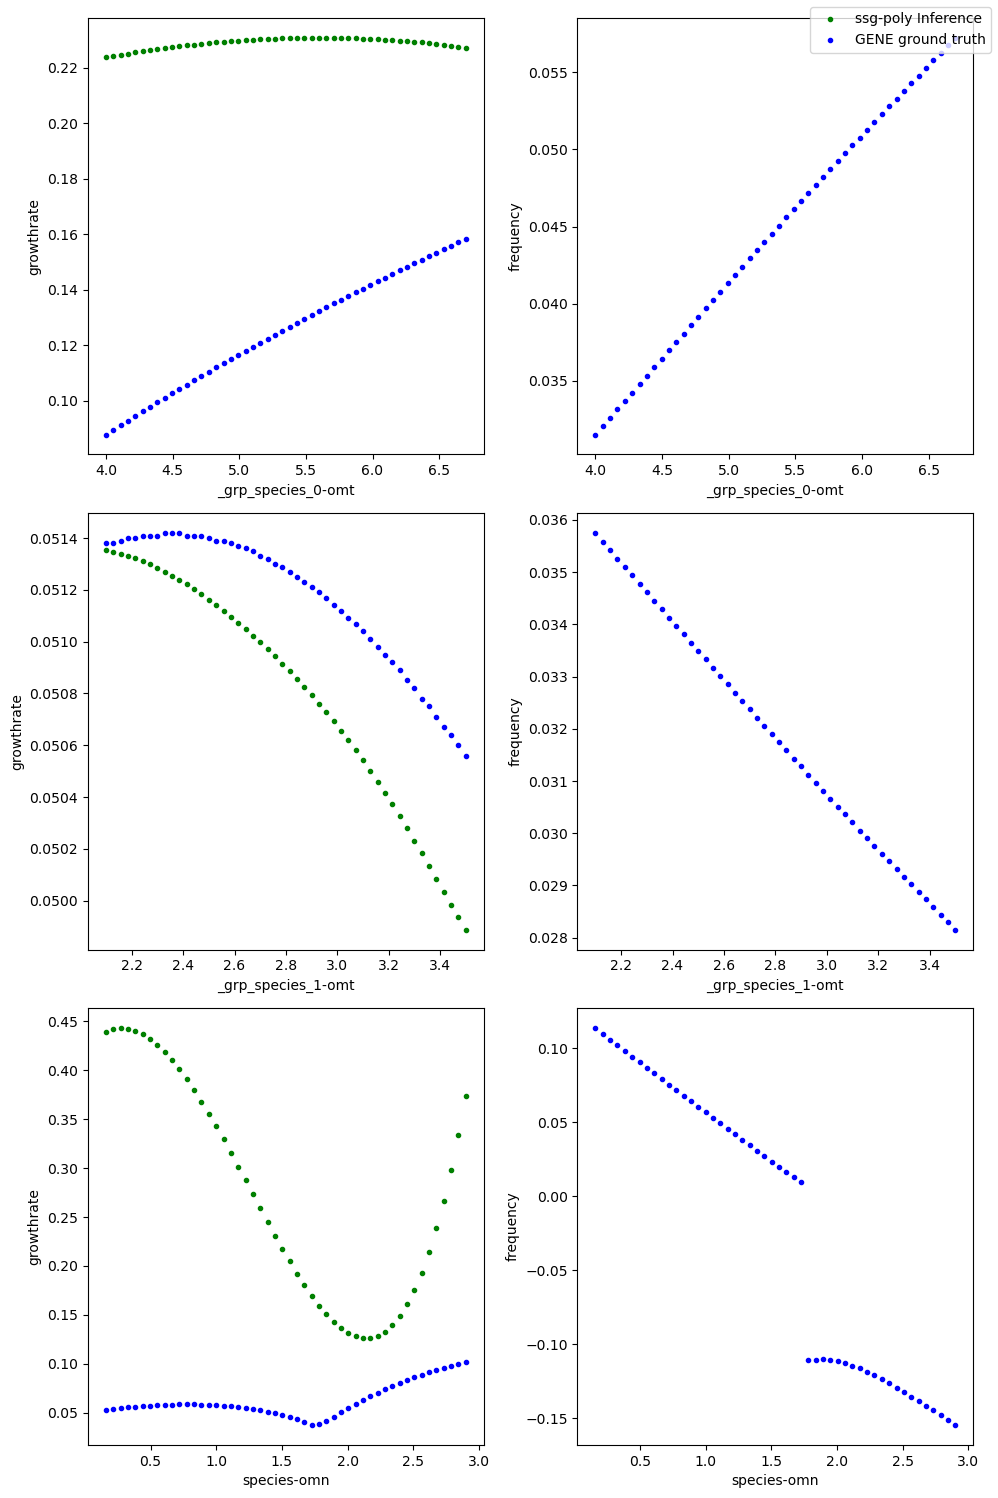

In [22]:
import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        if i == 0 and j == 0: 
            infer_label = 'ssg-poly Inference'
            gene_label = 'GENE ground truth'
        else:
            infer_label = None
            gene_label = None

        # col = GENE_groundTruth[i].df.columns.values.tolist()
        print(GENE_groundTruth[i].df[parameters[i]].head(2))
        x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
        if j == 0:
            AX[i][j].plot(x, results_poly_gt.growthrates[i], '.g', label=infer_label)

        AX[i][j].plot(x, y, '.b', label =gene_label)
        AX[i][j].set_xlabel(parameters[i])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
figure.legend()
plt.show(figure)


Initialising dataset
SSH PATH None:None

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 50
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST PERCENTAGE IS 0, NO SPLIT
Initialising dataset
SSH PATH None:None

LOADING FROM SCA

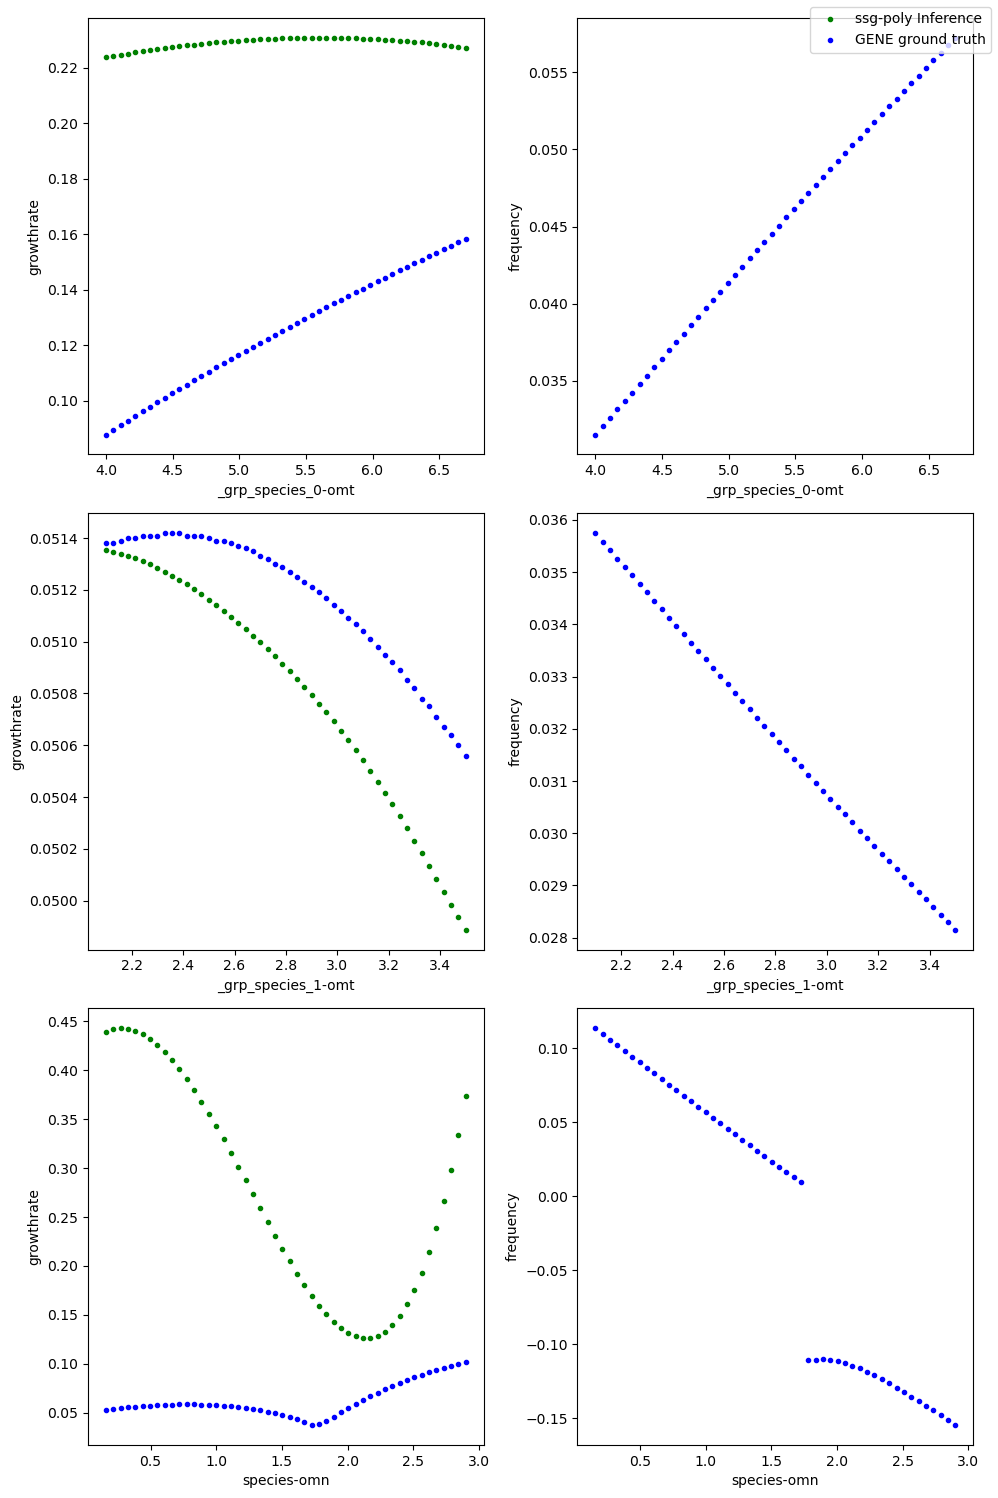

In [23]:
import os
from GENE_ML.gene_ml.results.results import ResultsGroundTruthTest

from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from GENE_ML.gene_ml.dataset.ScanData import ScanData
import numpy as np
import pandas as pd

from config import config
import os

def mode_transition_test(model, results_name):
    parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
    remote_save_names = ['modeTrans-highprec-'+p for p in parameters]
    # parser
    parser = GENE_scan_parser(config.save_dir, config.base_params_path)
    GENE_groundTruth = []
    for rms in remote_save_names:
        GENE_groundTruth.append(ScanData(rms, parser=parser, host=None, remote_path=None,  test_percentage=0))

    # Putting ground truth in correct format for inference, with other nominal parameters in place -------------   
    nominal_block = np.stack([nominal for i in range(len(GENE_groundTruth[0].df))])
    nominal_df = pd.DataFrame(nominal_block)
    nominal_df.columns=ssg_sampler.parameters

    for i in range(len(parameters)):
        new_df = nominal_df.copy()
        col = GENE_groundTruth[i].df.columns.values.tolist()
        new_df[ssg_sampler.parameters[i]] = GENE_groundTruth[i].df[col[1]].tolist()
        new_df['growthrate']=GENE_groundTruth[i].df['growthrate'].tolist()
        new_df['frequency']=GENE_groundTruth[i].df['frequency'].tolist()
        new_df.insert(0, 'run_time', GENE_groundTruth[i].df['run_time'].to_numpy())
        GENE_groundTruth[i].df = new_df
        GENE_groundTruth[i].set_from_df()    
        # print(GENE_groundTruth[i].x[0:5])
        # print(ssg_sampler.parameters)
        # print('NEW DF', GENE_groundTruth[i].df.head(5))

    #--------------------------------------------------------------------------------
    results = ResultsGroundTruthTest(results_name)

    if os.path.exists(results.path):
        print('\nLOADING RESULTS FROM FILE\n')
        results = results.load()
        print(f'{results.name} IS LOADED')
    else:
        results.altered_parameters_names = GENE_groundTruth[0].df.columns.values.tolist()
        for i in range(len(GENE_groundTruth)):
            print('\nCOMPUTING RESULTS\n')
            #Sampling already done, gene has been ran
            print("GT DATA NAME",GENE_groundTruth[i].name)
            results.growthrates.append(model.predict(GENE_groundTruth[i].x))
        results.save()

    import matplotlib.pyplot as plt
    gene_out = ['growthrate','frequency']
    width = 5
    height =5
    ncol = len(gene_out)
    nrow = len(GENE_groundTruth)
    figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

    for i in range(len(AX)):
        for j in range(len(AX[0])):
            if i == 0 and j == 0: 
                infer_label = 'ssg-poly Inference'
                gene_label = 'GENE ground truth'
            else:
                infer_label = None
                gene_label = None

            # col = GENE_groundTruth[i].df.columns.values.tolist()
            # print(GENE_groundTruth[i].df[parameters[i]].head(2))
            x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
            y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
            
            if j == 0:
                AX[i][j].plot(x, results.growthrates[i], '.g', label=infer_label)

            AX[i][j].plot(x, y, '.b', label =gene_label)
            AX[i][j].set_xlabel(parameters[i])
            AX[i][j].set_ylabel(gene_out[j])
            
    figure.tight_layout()
    figure.legend()
    plt.show(figure)


    

mode_transition_test(poly,'test')

# fit GPR to SSG points

In [31]:
ssg_data.df

,run_time,_grp_species_0-omt,_grp_species_1-omt,species-omn,growthrate,frequency
0,16.739,5.35,2.800000,1.530000,0.12091,0.06387
1,17.068,6.70,2.800000,1.530000,0.14990,0.07666
2,15.260,5.35,3.500000,1.530000,0.12286,0.05903
3,16.935,5.35,2.800000,2.900000,0.09682,-0.03230
4,14.677,4.00,2.800000,1.530000,0.08748,0.04885
...,...,...,...,...,...,...
79,13.279,5.35,2.338905,0.160000,0.11208,0.14882
80,16.836,5.35,3.204145,2.320970,0.11286,0.00899
81,14.242,5.35,2.100000,0.627572,0.11620,0.12186
82,15.789,5.35,3.500000,2.679778,0.10445,-0.02279


In [28]:
from GENE_ML.gene_ml.models.GPR import GPR
gpr = GPR(name='gpr_ssg_points_gt')
gpr.tune_hypers(x=ssg_data.x, y=ssg_data.growthrates)

OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 80.10808581442501
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   (3,)  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:


 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square


Optimization restart 1/3, f = -434.6937940255208
Optimization restart 2/3, f = -434.69377184710316
Optimization restart 3/3, f = -369.418075210569
RESULTING HYPERS:
 
Name : GP regression
Objective : -434.6937940255208
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |   0.0055823881913841114  |      +ve      |        
  rbf.lengthscale          |                    (3,)  |      +ve      |        
  Gaussian_noise.variance  |  1.8821321243146614e-15  |      +ve      |        


# Save results of GPR Ground Truth reference point inference

In [29]:
import os
from GENE_ML.gene_ml.results.results import ResultsGroundTruthTest

results_gpr_gt = ResultsGroundTruthTest(name='results_gpr-ssg_gt-highprec2')
if os.path.exists(results_gpr_gt.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_gpr_gt = results_gpr_gt.load()
    print(f'{results_gpr_gt.name} IS LOADED')
else:
    results_gpr_gt.altered_parameters_names = GENE_groundTruth[0].df.columns.values.tolist()
    for i in range(len(GENE_groundTruth)):
        print('\nCOMPUTING RESULTS\n')
        #Sampling already done, gene has been ran
        print("GT DATA NAME",GENE_groundTruth[i].name)
        results_gpr_gt.growthrates.append(gpr.predict(GENE_groundTruth[i].x))
    results_gpr_gt.save()


COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-_grp_species_0-omt

COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-_grp_species_1-omt

COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-species-omn


# Plotting results of GPR-ssg ground truth experiment

0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64


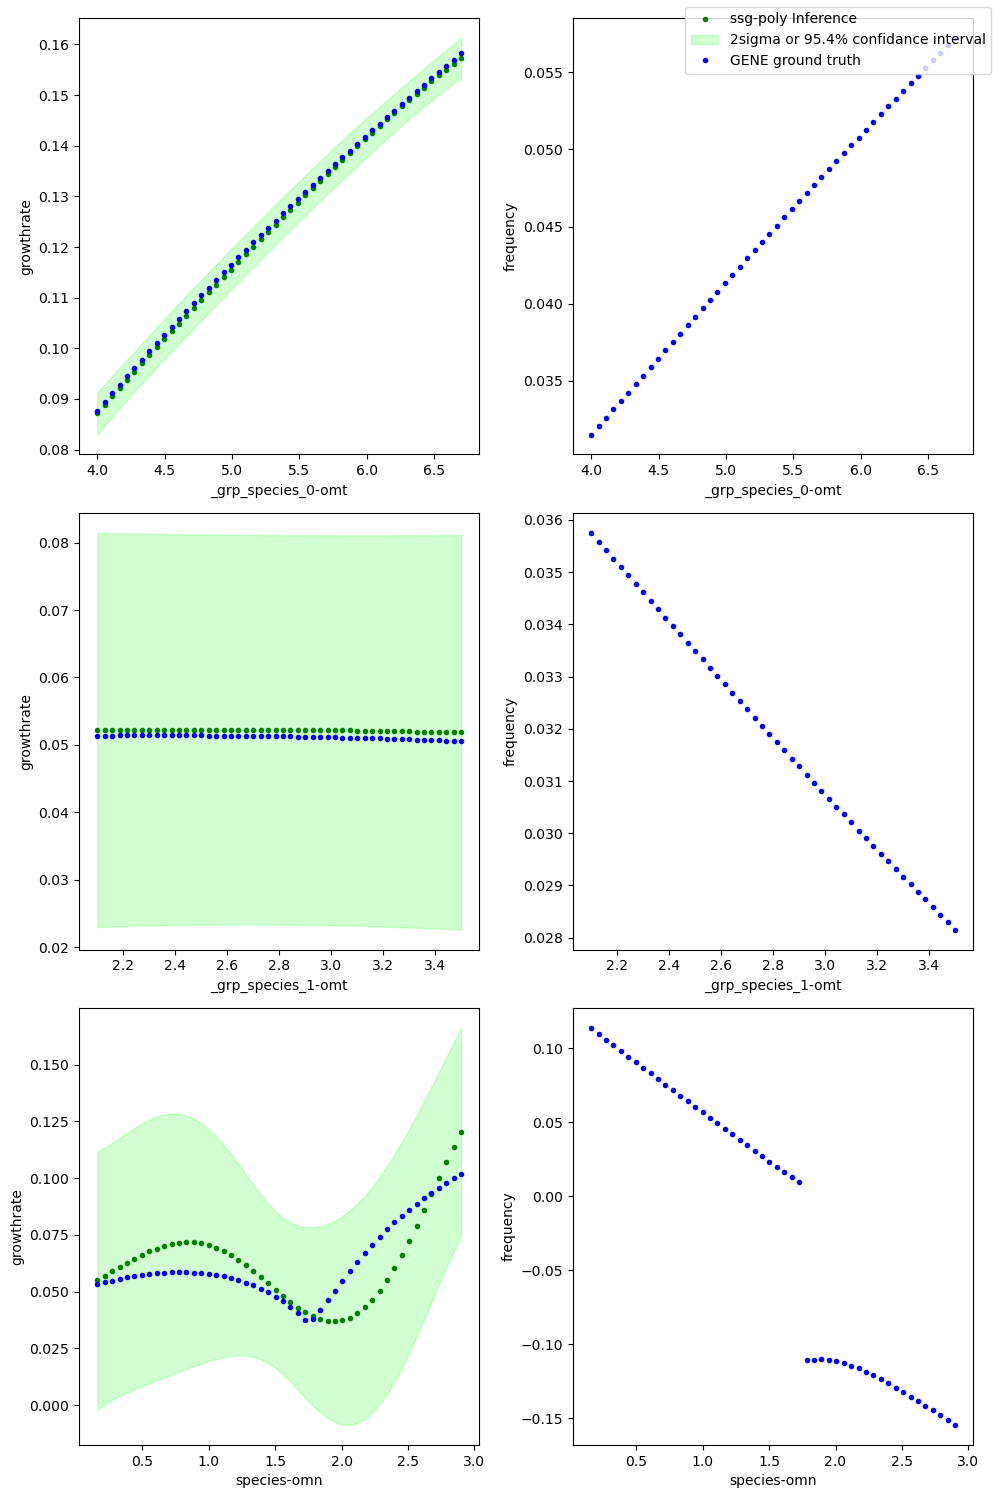

In [30]:
# import matplotlib.pyplot as plt
# gene_out = ['growthrate','frequency']
# width = 5
# height =5
# ncol = len(gene_out)
# nrow = len(GENE_groundTruth)
# figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

# for i in range(len(AX)):
#     for j in range(len(AX[0])):
#         if i == 0 and j == 0: 
#             infer_label = 'ssg-GPR Inference'
#             gene_label = 'GENE ground truth'
#             error_label = '2sigma or 95.4% confidance interval'
#         else:
#             infer_label = None
#             gene_label = None
#             error_label = None
#         col = GENE_groundTruth[i].df.columns.values.tolist()
#         x = GENE_groundTruth[i].df[col[i]].to_numpy(dtype=float)
#         y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
#         # if j == 0:
#         #     mean = results_gpr_gt.growthrates[i][0]
#         #     twosig = results_gpr_gt.growthrates[i][1]
#         #     AX[i][j].plot(x, mean, '.g', label = infer_label)
#         #     AX[i][j].fill_between(x, mean+twosig, mean-twosig, color=[0.1,1,0.1,0.2], label=error_label)

#         AX[i][j].plot(x, y, '.b', label = gene_label)
#         AX[i][j].set_xlabel(col[i])
#         AX[i][j].set_ylabel(gene_out[j])
        
# figure.legend()
# figure.tight_layout()
# plt.show(figure)

import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        if i == 0 and j == 0: 
            infer_label = 'ssg-poly Inference'
            gene_label = 'GENE ground truth'
            error_label = '2sigma or 95.4% confidance interval'
        else:
            infer_label = None
            gene_label = None
            error_label = None
        print(GENE_groundTruth[i].df[parameters[i]].head(2))
        x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
        if j == 0:
            mean = results_gpr_gt.growthrates[i][0]
            twosig = results_gpr_gt.growthrates[i][1]
            AX[i][j].plot(x, mean, '.g', label = infer_label)
            AX[i][j].fill_between(x, mean+twosig, mean-twosig, color=[0.1,1,0.1,0.2], label=error_label)

        AX[i][j].plot(x, y, '.b', label =gene_label)
        AX[i][j].set_xlabel(parameters[i])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
figure.legend()
plt.show(figure)
